# Assignment1 
### Christopher Hong

## Task 1

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Preparing the data

#### Loading the CIFAR10 dataset

In [2]:
# Load the data and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train_samples
10000 test samples


#### Selecting a subset of 3 classes

In [4]:
# Check the number of classes and their distribution
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [5]:
# Extract indices of class labels of 0, 1, 2
ind = np.argwhere(y_train.squeeze() < 3).squeeze()

In [6]:
x_train = x_train[ind]
y_train = y_train[ind]
assert(x_train.shape[0] == len(y_train))

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=uint8), array([5000, 5000, 5000]))

In [8]:
# Extract indices of class labels of 0, 1, 2
ind = np.argwhere(y_test.squeeze() < 3).squeeze()
x_test = x_test[ind]
y_test = y_test[ind]
assert(x_test.shape[0] == len(y_test))

In [9]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([1000, 1000, 1000]))

#### Encoding the data

In [10]:
# Convert and vectorize class labels to binary class matrices 
y_train = np.asarray(to_categorical(y_train)).astype('float32')
y_test = np.asarray(to_categorical(y_test)).astype('float32')

#### Normalizing the data

In [11]:
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)

#### Setting aside a validation set

In [12]:
val_size = int(x_train.shape[0] * 0.2)
x_val, partial_x_train = x_train[:val_size], x_train[val_size:]
y_val, partial_y_train = y_train[:val_size], y_train[val_size:]

### Creating a model using the Sequential API

#### Defining a model

In [27]:
cifar_model = Sequential()
cifar_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
cifar_model.add(Dense(64, activation='relu'))
cifar_model.add(Dense(3, activation='softmax'))

#### Compiling the model

In [28]:
# Train the model using Adam
cifar_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [29]:
cifar_history = cifar_model.fit(partial_x_train, 
                                partial_y_train,
                                epochs=100,
                                batch_size=512,
                                validation_data=(x_val, y_val),
                                verbose=0)

#### Plotting the training and validation loss and accuracy

In [30]:
def plot_model_performance(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show();
    
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show();

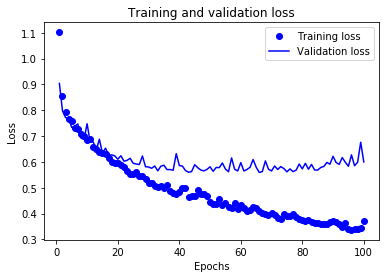

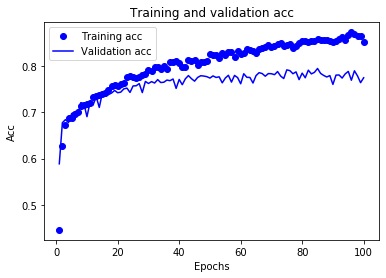

In [31]:
plot_model_performance(cifar_history)

#### Find out the best # of epochs using EarlyStopping

In [36]:
np.random.seed(0)
cifar_model = Sequential()
cifar_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
cifar_model.add(Dense(64, activation='relu'))
cifar_model.add(Dense(3, activation='softmax'))

cifar_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cifar_history = cifar_model.fit(partial_x_train, 
                                partial_y_train,
                                epochs=100,
                                batch_size=512,
                                validation_data=(x_val, y_val),
                                callbacks=[EarlyStopping(patience=10)])

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 0s 28us/step - loss: 1.0011 - accuracy: 0.5178 - val_loss: 0.8711 - val_accuracy: 0.6393
Epoch 2/100
12000/12000 [==============================] - 0s 20us/step - loss: 0.8361 - accuracy: 0.6562 - val_loss: 0.7945 - val_accuracy: 0.6763
Epoch 3/100
12000/12000 [==============================] - 0s 20us/step - loss: 0.7860 - accuracy: 0.6767 - val_loss: 0.7683 - val_accuracy: 0.6807
Epoch 4/100
12000/12000 [==============================] - 0s 20us/step - loss: 0.7525 - accuracy: 0.6902 - val_loss: 0.7203 - val_accuracy: 0.7180
Epoch 5/100
12000/12000 [==============================] - 0s 20us/step - loss: 0.7305 - accuracy: 0.7013 - val_loss: 0.6944 - val_accuracy: 0.7237
Epoch 6/100
12000/12000 [==============================] - 0s 21us/step - loss: 0.6992 - accuracy: 0.7218 - val_loss: 0.7011 - val_accuracy: 0.7080
Epoch 7/100
12000/12000 [==============================] - 0s 2

#### Retraining a model from scratch

In [41]:
np.random.seed(0)
cifar_model = Sequential()
cifar_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
cifar_model.add(Dense(64, activation='relu'))
cifar_model.add(Dense(3, activation='softmax'))

cifar_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cifar_history = cifar_model.fit(x_train, 
                                y_train,
                                epochs=44,
                                batch_size=512)

cifar_model.evaluate(x_test, y_test)

Epoch 1/44
15000/15000 [==============================] - 0s 21us/step - loss: 1.0058 - accuracy: 0.5210
Epoch 2/44
15000/15000 [==============================] - 0s 16us/step - loss: 0.8099 - accuracy: 0.6609
Epoch 3/44
15000/15000 [==============================] - 0s 17us/step - loss: 0.7621 - accuracy: 0.6874
Epoch 4/44
15000/15000 [==============================] - 0s 16us/step - loss: 0.7437 - accuracy: 0.6926
Epoch 5/44
15000/15000 [==============================] - 0s 16us/step - loss: 0.7135 - accuracy: 0.7094
Epoch 6/44
15000/15000 [==============================] - 0s 16us/step - loss: 0.6951 - accuracy: 0.7159
Epoch 7/44
15000/15000 [==============================] - 0s 16us/step - loss: 0.6767 - accuracy: 0.7239
Epoch 8/44
15000/15000 [==============================] - 0s 17us/step - loss: 0.6626 - accuracy: 0.7334
Epoch 9/44
15000/15000 [==============================] - 0s 16us/step - loss: 0.6556 - accuracy: 0.7335
Epoch 10/44
15000/15000 [==============================

[0.5244605533281962, 0.7903333306312561]

### Fine tuning the model

#### Randomized serach CV for best params

In [43]:
# Create a classification model with given hyperperameters
def build_model(learning_rate=1e-3, n_hidden=1, n_neurons=64, input_shape=3072):   
    model = Sequential()
    for layer in range(n_hidden):
        if layer == 0:
            model.add(Dense(n_neurons, activation='relu', input_shape=(input_shape,)))
        else:
            model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [44]:
# Create a Keras classifier
keras_clf = KerasClassifier(build_model)

In [45]:
np.random.seed(0)
params = {
    'learning_rate': [0.0001, 0.001, 0.1],
    'n_hidden': [2, 3, 4],
    'n_neurons': [256, 512, 1024],
    'batch_size': [128, 256, 512]}

random_search_cv = RandomizedSearchCV(keras_clf, params, n_iter=10, cv=3, random_state=0)
random_search_cv.fit(partial_x_train,
                     partial_y_train,
                     epochs=100,
                     validation_data=(x_val, y_val),
                     callbacks=[EarlyStopping(patience=10)],
                     verbose=0)

Train on 8000 samples, validate on 3000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 88us/step - loss: 10244.5490 - accuracy: 0.3383 - val_loss: 6.2688 - val_accuracy: 0.3340
Epoch 2/100
8000/8000 [==============================] - 1s 73us/step - loss: 2.6647 - accuracy: 0.3311 - val_loss: 3.9739 - val_accuracy: 0.3437
Epoch 3/100
8000/8000 [==============================] - 1s 76us/step - loss: 1.1227 - accuracy: 0.3410 - val_loss: 1.6649 - val_accuracy: 0.3340
Epoch 4/100
8000/8000 [==============================] - 1s 71us/step - loss: 1.1253 - accuracy: 0.3405 - val_loss: 1.6898 - val_accuracy: 0.3340
Epoch 5/100
8000/8000 [==============================] - 1s 72us/step - loss: 1.1223 - accuracy: 0.3301 - val_loss: 1.6530 - val_accuracy: 0.3233
Epoch 6/100
8000/8000 [==============================] - 1s 73us/step - loss: 1.1099 - accuracy: 0.3315 - val_loss: 1.6527 - val_accuracy: 0.3430
Epoch 7/100
8000/8000 [==============================] - 1s 73us/step - 

8000/8000 [==============================] - 1s 78us/step - loss: 1.0995 - accuracy: 0.3296 - val_loss: 1.0985 - val_accuracy: 0.3427
Epoch 22/100
4000/4000 [==============================] - 0s 22us/step
Train on 8000 samples, validate on 3000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.9381 - accuracy: 0.5683 - val_loss: 0.8370 - val_accuracy: 0.6433
Epoch 2/100
8000/8000 [==============================] - 0s 42us/step - loss: 0.8014 - accuracy: 0.6687 - val_loss: 0.7590 - val_accuracy: 0.6940
Epoch 3/100
8000/8000 [==============================] - 0s 36us/step - loss: 0.7536 - accuracy: 0.6944 - val_loss: 0.7195 - val_accuracy: 0.7120
Epoch 4/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.7237 - accuracy: 0.7076 - val_loss: 0.6995 - val_accuracy: 0.7190
Epoch 5/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.6988 - accuracy: 0.7258 - val_loss: 0.6924 - val_accuracy: 0.7197
Epoch 6/100
8000/

8000/8000 [==============================] - 0s 33us/step - loss: 0.6834 - accuracy: 0.7303 - val_loss: 0.6833 - val_accuracy: 0.7107
Epoch 6/100
8000/8000 [==============================] - 0s 31us/step - loss: 0.6626 - accuracy: 0.7355 - val_loss: 0.6581 - val_accuracy: 0.7257
Epoch 7/100
8000/8000 [==============================] - 0s 31us/step - loss: 0.6413 - accuracy: 0.7420 - val_loss: 0.6493 - val_accuracy: 0.7373
Epoch 8/100
8000/8000 [==============================] - 0s 32us/step - loss: 0.6321 - accuracy: 0.7454 - val_loss: 0.6408 - val_accuracy: 0.7320
Epoch 9/100
8000/8000 [==============================] - 0s 31us/step - loss: 0.6037 - accuracy: 0.7610 - val_loss: 0.6197 - val_accuracy: 0.7483
Epoch 10/100
8000/8000 [==============================] - 0s 31us/step - loss: 0.5885 - accuracy: 0.7675 - val_loss: 0.6245 - val_accuracy: 0.7500
Epoch 11/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.5920 - accuracy: 0.7604 - val_loss: 0.6089 - val_accur

8000/8000 [==============================] - 0s 32us/step - loss: 0.3315 - accuracy: 0.8708 - val_loss: 0.5593 - val_accuracy: 0.7833
Epoch 29/100
8000/8000 [==============================] - 0s 32us/step - loss: 0.2939 - accuracy: 0.8896 - val_loss: 0.5749 - val_accuracy: 0.7853
Epoch 30/100
8000/8000 [==============================] - 0s 32us/step - loss: 0.2828 - accuracy: 0.8967 - val_loss: 0.5512 - val_accuracy: 0.7933
Epoch 31/100
8000/8000 [==============================] - 0s 32us/step - loss: 0.2889 - accuracy: 0.8889 - val_loss: 0.5414 - val_accuracy: 0.7897
Epoch 32/100
4000/4000 [==============================] - 0s 12us/step
Train on 8000 samples, validate on 3000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.9587 - accuracy: 0.5639 - val_loss: 0.8273 - val_accuracy: 0.6427
Epoch 2/100
8000/8000 [==============================] - 0s 31us/step - loss: 0.7723 - accuracy: 0.6861 - val_loss: 0.7317 - val_accuracy: 0.6900
Epoch 3/100
80

8000/8000 [==============================] - 1s 70us/step - loss: 0.6347 - accuracy: 0.7312 - val_loss: 0.6440 - val_accuracy: 0.7323
Epoch 7/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.5986 - accuracy: 0.7526 - val_loss: 0.6430 - val_accuracy: 0.7307
Epoch 8/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.5967 - accuracy: 0.7525 - val_loss: 0.6609 - val_accuracy: 0.7187
Epoch 9/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.5853 - accuracy: 0.7595 - val_loss: 0.6523 - val_accuracy: 0.7310
Epoch 10/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.5549 - accuracy: 0.7744 - val_loss: 0.6368 - val_accuracy: 0.7257
Epoch 11/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.5219 - accuracy: 0.7906 - val_loss: 0.7313 - val_accuracy: 0.7173
Epoch 12/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.5392 - accuracy: 0.7820 - val_loss: 0.6104 - val_accu

8000/8000 [==============================] - 0s 55us/step - loss: 0.4617 - accuracy: 0.8154 - val_loss: 0.5500 - val_accuracy: 0.7767
Epoch 27/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.4296 - accuracy: 0.8267 - val_loss: 0.6002 - val_accuracy: 0.7577
Epoch 28/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.4062 - accuracy: 0.8366 - val_loss: 0.6560 - val_accuracy: 0.7577
Epoch 29/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.4354 - accuracy: 0.8231 - val_loss: 0.6895 - val_accuracy: 0.7363
Epoch 30/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.4169 - accuracy: 0.8322 - val_loss: 0.6020 - val_accuracy: 0.7723
Epoch 31/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.4125 - accuracy: 0.8330 - val_loss: 0.6699 - val_accuracy: 0.7387
Epoch 32/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.4133 - accuracy: 0.8325 - val_loss: 0.5850 - val_a

Epoch 20/100
8000/8000 [==============================] - 0s 40us/step - loss: 0.8244 - accuracy: 0.6494 - val_loss: 1.4391 - val_accuracy: 0.6147
Epoch 21/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.7511 - accuracy: 0.6846 - val_loss: 1.3669 - val_accuracy: 0.6607
Epoch 22/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.7365 - accuracy: 0.6951 - val_loss: 1.3304 - val_accuracy: 0.6877
Epoch 23/100
8000/8000 [==============================] - 0s 39us/step - loss: 0.7549 - accuracy: 0.6861 - val_loss: 1.3711 - val_accuracy: 0.6823
Epoch 24/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.7601 - accuracy: 0.6829 - val_loss: 1.3559 - val_accuracy: 0.6823
Epoch 25/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.7257 - accuracy: 0.7030 - val_loss: 1.3121 - val_accuracy: 0.6957
Epoch 26/100
8000/8000 [==============================] - 0s 40us/step - loss: 0.7332 - accuracy: 0.6974 - val_loss: 1

8000/8000 [==============================] - 0s 35us/step - loss: 0.3276 - accuracy: 0.8770 - val_loss: 0.5353 - val_accuracy: 0.7827
Epoch 36/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.3121 - accuracy: 0.8795 - val_loss: 0.5019 - val_accuracy: 0.8047
Epoch 37/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.2850 - accuracy: 0.8949 - val_loss: 0.5196 - val_accuracy: 0.7987
Epoch 38/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.3037 - accuracy: 0.8814 - val_loss: 0.5119 - val_accuracy: 0.7987
Epoch 39/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.2929 - accuracy: 0.8861 - val_loss: 0.5208 - val_accuracy: 0.7903
Epoch 40/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.2873 - accuracy: 0.8915 - val_loss: 0.5461 - val_accuracy: 0.7897
Epoch 41/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.2660 - accuracy: 0.8976 - val_loss: 0.5229 - val_a

8000/8000 [==============================] - 0s 26us/step - loss: 0.4867 - accuracy: 0.8120 - val_loss: 0.5460 - val_accuracy: 0.7703
Epoch 20/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4776 - accuracy: 0.8164 - val_loss: 0.5340 - val_accuracy: 0.7767
Epoch 21/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4606 - accuracy: 0.8270 - val_loss: 0.5433 - val_accuracy: 0.7747
Epoch 22/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4534 - accuracy: 0.8310 - val_loss: 0.5419 - val_accuracy: 0.7767
Epoch 23/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4530 - accuracy: 0.8239 - val_loss: 0.5401 - val_accuracy: 0.7757
Epoch 24/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4376 - accuracy: 0.8359 - val_loss: 0.5196 - val_accuracy: 0.7900
Epoch 25/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4372 - accuracy: 0.8346 - val_loss: 0.5390 - val_a

8000/8000 [==============================] - 0s 26us/step - loss: 0.4570 - accuracy: 0.8256 - val_loss: 0.5443 - val_accuracy: 0.7810
Epoch 24/100
8000/8000 [==============================] - 0s 26us/step - loss: 0.4402 - accuracy: 0.8321 - val_loss: 0.5369 - val_accuracy: 0.7810
Epoch 25/100
8000/8000 [==============================] - 0s 26us/step - loss: 0.4276 - accuracy: 0.8367 - val_loss: 0.5305 - val_accuracy: 0.7833
Epoch 26/100
8000/8000 [==============================] - 0s 26us/step - loss: 0.4332 - accuracy: 0.8310 - val_loss: 0.5282 - val_accuracy: 0.7800
Epoch 27/100
8000/8000 [==============================] - 0s 26us/step - loss: 0.4290 - accuracy: 0.8303 - val_loss: 0.5228 - val_accuracy: 0.7857
Epoch 28/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4165 - accuracy: 0.8411 - val_loss: 0.5344 - val_accuracy: 0.7823
Epoch 29/100
8000/8000 [==============================] - 0s 27us/step - loss: 0.4020 - accuracy: 0.8465 - val_loss: 0.5413 - val_a

8000/8000 [==============================] - 1s 142us/step - loss: 1.1346 - accuracy: 0.3226 - val_loss: 7429.2312 - val_accuracy: 0.3430
Epoch 7/100
8000/8000 [==============================] - 1s 140us/step - loss: 1.1210 - accuracy: 0.3274 - val_loss: 7429.3312 - val_accuracy: 0.3337
Epoch 8/100
8000/8000 [==============================] - 1s 142us/step - loss: 1.1345 - accuracy: 0.3282 - val_loss: 7429.5466 - val_accuracy: 0.3230
Epoch 9/100
8000/8000 [==============================] - 1s 140us/step - loss: 1.1129 - accuracy: 0.3374 - val_loss: 7429.5326 - val_accuracy: 0.3233
Epoch 10/100
8000/8000 [==============================] - 1s 141us/step - loss: 1.1341 - accuracy: 0.3326 - val_loss: 7429.1926 - val_accuracy: 0.3233
Epoch 11/100
8000/8000 [==============================] - 1s 155us/step - loss: 1.1131 - accuracy: 0.3284 - val_loss: 7428.8211 - val_accuracy: 0.3430
Epoch 12/100
8000/8000 [==============================] - 1s 143us/step - loss: 1.1155 - accuracy: 0.3354 - va

Epoch 14/100
8000/8000 [==============================] - 1s 143us/step - loss: 1.0752 - accuracy: 0.3927 - val_loss: 1.0769 - val_accuracy: 0.3933
Epoch 15/100
8000/8000 [==============================] - 1s 148us/step - loss: 1.0742 - accuracy: 0.4013 - val_loss: 1.0699 - val_accuracy: 0.4127
Epoch 16/100
4000/4000 [==============================] - 0s 31us/step
Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 0s 37us/step - loss: 0.9162 - accuracy: 0.5862 - val_loss: 0.7841 - val_accuracy: 0.6900
Epoch 2/100
12000/12000 [==============================] - 0s 30us/step - loss: 0.7733 - accuracy: 0.6885 - val_loss: 0.7283 - val_accuracy: 0.6977
Epoch 3/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.7153 - accuracy: 0.7147 - val_loss: 0.6954 - val_accuracy: 0.7093
Epoch 4/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.6867 - accuracy: 0.7278 - val_loss: 0.6959 - val_accuracy:

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f65f5130290>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [128, 256, 512],
                                        'learning_rate': [0.0001, 0.001, 0.1],
                                        'n_hidden': [2, 3, 4],
                                        'n_neurons': [256, 512, 1024]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

#### Best params

In [46]:
random_search_cv.best_params_

{'n_neurons': 512, 'n_hidden': 2, 'learning_rate': 0.0001, 'batch_size': 512}

In [24]:
random_search_cv.best_score_

0.8012500007947286

#### Save the best model and retrain it

In [50]:
cifar_model = random_search_cv.best_estimator_.model
cifar_model.fit(x_train,
                y_train,
                epochs=100,
                batch_size=512)

cifar_model.evaluate(x_test, y_test)

Epoch 1/100
15000/15000 [==============================] - 0s 24us/step - loss: 0.2697 - accuracy: 0.9012
Epoch 2/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2625 - accuracy: 0.9051
Epoch 3/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.9178
Epoch 4/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2441 - accuracy: 0.9123
Epoch 5/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2336 - accuracy: 0.9195
Epoch 6/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2198 - accuracy: 0.9227
Epoch 7/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2239 - accuracy: 0.9218
Epoch 8/100
15000/15000 [==============================] - 0s 22us/step - loss: 0.2131 - accuracy: 0.9249
Epoch 9/100
15000/15000 [==============================] - 0s 23us/step - loss: 0.2239 - accuracy: 0.9173
Epoch 10/100
15000/15000 [====================

[0.7204937424659729, 0.8130000233650208]

In [57]:
np.random.seed(0)
cifar_model = build_model(learning_rate=1e-4, n_hidden=2, n_neurons=512)
cifar_model.fit(partial_x_train,
                partial_y_train,
                epochs=100,
                batch_size=512,
                validation_data=(x_val, y_val),
                callbacks=[EarlyStopping(patience=10)])

cifar_model.evaluate(x_test, y_test)

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 0s 35us/step - loss: 0.9022 - accuracy: 0.6005 - val_loss: 0.7747 - val_accuracy: 0.6927
Epoch 2/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.7513 - accuracy: 0.7023 - val_loss: 0.7243 - val_accuracy: 0.7097
Epoch 3/100
12000/12000 [==============================] - 0s 27us/step - loss: 0.7111 - accuracy: 0.7132 - val_loss: 0.6944 - val_accuracy: 0.7203
Epoch 4/100
12000/12000 [==============================] - 0s 27us/step - loss: 0.6703 - accuracy: 0.7367 - val_loss: 0.6467 - val_accuracy: 0.7370
Epoch 5/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.6472 - accuracy: 0.7417 - val_loss: 0.6304 - val_accuracy: 0.7463
Epoch 6/100
12000/12000 [==============================] - 0s 26us/step - loss: 0.6159 - accuracy: 0.7607 - val_loss: 0.6196 - val_accuracy: 0.7503
Epoch 7/100
12000/12000 [==============================] - 0s 2

Epoch 56/100
12000/12000 [==============================] - 0s 24us/step - loss: 0.2128 - accuracy: 0.9248 - val_loss: 0.5099 - val_accuracy: 0.8063
Epoch 57/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2130 - accuracy: 0.9254 - val_loss: 0.4768 - val_accuracy: 0.8240
Epoch 58/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.2009 - accuracy: 0.9323 - val_loss: 0.4922 - val_accuracy: 0.8173
Epoch 59/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.1928 - accuracy: 0.9358 - val_loss: 0.4931 - val_accuracy: 0.8157
Epoch 60/100
12000/12000 [==============================] - 0s 25us/step - loss: 0.1905 - accuracy: 0.9371 - val_loss: 0.4805 - val_accuracy: 0.8233
Epoch 61/100
3000/3000 [==============================] - 0s 45us/step


[0.4764563307762146, 0.8243333101272583]

#### Early stopping

In [64]:
np.random.seed(0)
cifar_model = build_model(learning_rate=1e-4, n_hidden=2, n_neurons=512)
cifar_model.fit(x_train,
                y_train,
                epochs=51,
                batch_size=512)

cifar_model.evaluate(x_test, y_test)

Epoch 1/51
15000/15000 [==============================] - 0s 28us/step - loss: 0.8806 - accuracy: 0.6159
Epoch 2/51
15000/15000 [==============================] - 0s 23us/step - loss: 0.7365 - accuracy: 0.7032
Epoch 3/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.6838 - accuracy: 0.7286
Epoch 4/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.6547 - accuracy: 0.7420
Epoch 5/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.6232 - accuracy: 0.7533
Epoch 6/51
15000/15000 [==============================] - 0s 23us/step - loss: 0.5978 - accuracy: 0.7631
Epoch 7/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.5761 - accuracy: 0.7731
Epoch 8/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.5556 - accuracy: 0.7827
Epoch 9/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.5427 - accuracy: 0.7819
Epoch 10/51
15000/15000 [==============================

[0.43873230934143065, 0.8386666774749756]

#### l2 regularization

In [69]:
np.random.seed(0)
l2_cifar_model = Sequential()
l2_cifar_model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(0.0001),
                    activation='relu', input_shape=(x_train.shape[1],)))
l2_cifar_model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(0.0001),
                      activation='relu'))
l2_cifar_model.add(Dense(3, activation='softmax'))

l2_cifar_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

l2_cifar_model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[EarlyStopping(patience=10)])

l2_cifar_model.evaluate(x_test, y_test)

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 0s 41us/step - loss: 1.5407 - accuracy: 0.4467 - val_loss: 1.0245 - val_accuracy: 0.6327
Epoch 2/100
12000/12000 [==============================] - 0s 28us/step - loss: 0.9860 - accuracy: 0.6276 - val_loss: 0.9521 - val_accuracy: 0.6423
Epoch 3/100
12000/12000 [==============================] - 0s 29us/step - loss: 0.9082 - accuracy: 0.6648 - val_loss: 0.8559 - val_accuracy: 0.6950
Epoch 4/100
12000/12000 [==============================] - 0s 29us/step - loss: 0.8549 - accuracy: 0.6908 - val_loss: 0.8517 - val_accuracy: 0.6863
Epoch 5/100
12000/12000 [==============================] - 0s 28us/step - loss: 0.8244 - accuracy: 0.7017 - val_loss: 0.7795 - val_accuracy: 0.7260
Epoch 6/100
12000/12000 [==============================] - 0s 29us/step - loss: 0.7802 - accuracy: 0.7223 - val_loss: 0.7585 - val_accuracy: 0.7310
Epoch 7/100
12000/12000 [==============================] - 0s 2

[0.5865164754390717, 0.7946666479110718]

In [70]:
np.random.seed(0)
l2_cifar_model = Sequential()
l2_cifar_model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(0.0001),
                    activation='relu', input_shape=(x_train.shape[1],)))
l2_cifar_model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(0.0001),
                      activation='relu'))
l2_cifar_model.add(Dense(3, activation='softmax'))

l2_cifar_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

l2_cifar_model.fit(x_train, 
                    y_train,
                    epochs=28,
                    batch_size=512)

l2_cifar_model.evaluate(x_test, y_test)

Epoch 1/28
15000/15000 [==============================] - 1s 33us/step - loss: 1.3604 - accuracy: 0.5025
Epoch 2/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.9039 - accuracy: 0.6742
Epoch 3/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.8375 - accuracy: 0.7011
Epoch 4/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.8001 - accuracy: 0.7112
Epoch 5/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.7730 - accuracy: 0.7179
Epoch 6/28
15000/15000 [==============================] - 0s 25us/step - loss: 0.7702 - accuracy: 0.7155
Epoch 7/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.7133 - accuracy: 0.7464
Epoch 8/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.6750 - accuracy: 0.7607
Epoch 9/28
15000/15000 [==============================] - 0s 24us/step - loss: 0.6595 - accuracy: 0.7638
Epoch 10/28
15000/15000 [==============================

[0.5325062424341838, 0.8100000023841858]

#### Dropout

In [75]:
np.random.seed(0)
do_cifar_model = Sequential()
do_cifar_model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
do_cifar_model.add(Dropout(0.2))
do_cifar_model.add(Dense(512, activation='relu'))
do_cifar_model.add(Dropout(0.2))
do_cifar_model.add(Dense(3, activation='softmax'))

do_cifar_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

do_cifar_model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[EarlyStopping(patience=10)])
do_cifar_model.evaluate(x_test, y_test)

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 0s 41us/step - loss: 1.5703 - accuracy: 0.3821 - val_loss: 0.9849 - val_accuracy: 0.5540
Epoch 2/100
12000/12000 [==============================] - 0s 28us/step - loss: 0.9211 - accuracy: 0.5807 - val_loss: 0.8027 - val_accuracy: 0.6570
Epoch 3/100
12000/12000 [==============================] - 0s 27us/step - loss: 0.8155 - accuracy: 0.6576 - val_loss: 0.7379 - val_accuracy: 0.7040
Epoch 4/100
12000/12000 [==============================] - 0s 28us/step - loss: 0.7624 - accuracy: 0.6889 - val_loss: 0.6944 - val_accuracy: 0.7173
Epoch 5/100
12000/12000 [==============================] - 0s 27us/step - loss: 0.7193 - accuracy: 0.7079 - val_loss: 0.6814 - val_accuracy: 0.7177
Epoch 6/100
12000/12000 [==============================] - 0s 27us/step - loss: 0.7106 - accuracy: 0.7064 - val_loss: 0.6824 - val_accuracy: 0.7160
Epoch 7/100
12000/12000 [==============================] - 0s 2

[0.518735467116038, 0.7960000038146973]

In [77]:
np.random.seed(0)
do_cifar_model = Sequential()
do_cifar_model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
do_cifar_model.add(Dropout(0.2))
do_cifar_model.add(Dense(512, activation='relu'))
do_cifar_model.add(Dropout(0.2))
do_cifar_model.add(Dense(3, activation='softmax'))

do_cifar_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

do_cifar_model.fit(x_train, 
                    y_train,
                    epochs=36,
                    batch_size=512)
do_cifar_model.evaluate(x_test, y_test)

Epoch 1/36
15000/15000 [==============================] - 1s 33us/step - loss: 1.3237 - accuracy: 0.4345
Epoch 2/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.8519 - accuracy: 0.6364
Epoch 3/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.7727 - accuracy: 0.6789
Epoch 4/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.7243 - accuracy: 0.7053
Epoch 5/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.7058 - accuracy: 0.7087
Epoch 6/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.6895 - accuracy: 0.7153
Epoch 7/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.6626 - accuracy: 0.7315
Epoch 8/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.6416 - accuracy: 0.7427
Epoch 9/36
15000/15000 [==============================] - 0s 24us/step - loss: 0.6255 - accuracy: 0.7457
Epoch 10/36
15000/15000 [==============================

[0.5020982257525126, 0.8026666641235352]

#### Built the final model

In [80]:
np.random.seed(0)
cifar_model = Sequential()
cifar_model.add(Dense(512, activation='relu', input_shape=(3072,)))
cifar_model.add(Dense(512, activation='relu'))
cifar_model.add(Dense(3, activation='softmax'))

cifar_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

cifar_history = cifar_model.fit(x_train, 
                                y_train,
                                epochs=51,
                                batch_size=512)
cifar_model.evaluate(x_test, y_test)

Epoch 1/51
15000/15000 [==============================] - 0s 28us/step - loss: 0.8780 - accuracy: 0.6215
Epoch 2/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.7339 - accuracy: 0.7084
Epoch 3/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.6824 - accuracy: 0.7266
Epoch 4/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.6513 - accuracy: 0.7427
Epoch 5/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.6200 - accuracy: 0.7561
Epoch 6/51
15000/15000 [==============================] - 0s 21us/step - loss: 0.5963 - accuracy: 0.7653
Epoch 7/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.5751 - accuracy: 0.7747
Epoch 8/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.5554 - accuracy: 0.7823
Epoch 9/51
15000/15000 [==============================] - 0s 22us/step - loss: 0.5457 - accuracy: 0.7843
Epoch 10/51
15000/15000 [==============================

[0.44081248982747395, 0.8336666822433472]

#### Save model and weights

In [81]:
cifar_model.save('keras_cifar10_trained_model.h5')

#### Score trained model

In [82]:
model = keras.models.load_model('keras_cifar10_trained_model.h5')
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss', scores[0])
print('Test accuracy', scores[1])

3000/3000 [==============================] - 0s 70us/step
Test loss 0.44081248982747395
Test accuracy 0.8336666822433472
